<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Python_gen_ai_ML_3days_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎓 Original Dataset:
    Maths  Science  English  History  Sports Result
0      88       47       66       59      55   Pass
1      78       66       81       48      69   Pass
2      64       46       67       84      23   Fail
3      92       68       55       43      21   Fail
4      57       88       54       60      25   Fail
5      70       74       86       36      73   Pass
6      88       82       83       54      23   Pass
7      68       46       42       62      73   Fail
8      72       65       76       81      82   Pass
9      60       77       46       41      37   Fail
10     60       56       60       78      63   Pass
11     73       66       48       42      53   Fail
12     85       88       78       81      93   Pass
13     89       69       57       69      81   Pass
14     73       93       43       48      33   Fail

🔢 Scaled Features:
       Maths   Science   English   History    Sports
0   1.198146 -1.465054  0.218530 -0.004228  0.058321
1   0.312816 -0.184255

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


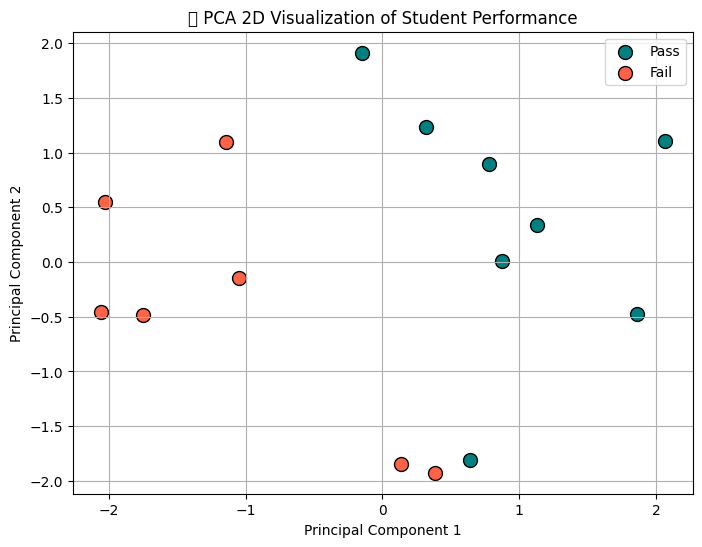

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


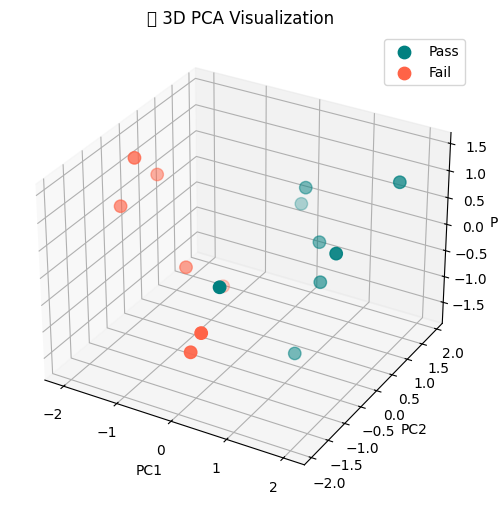

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


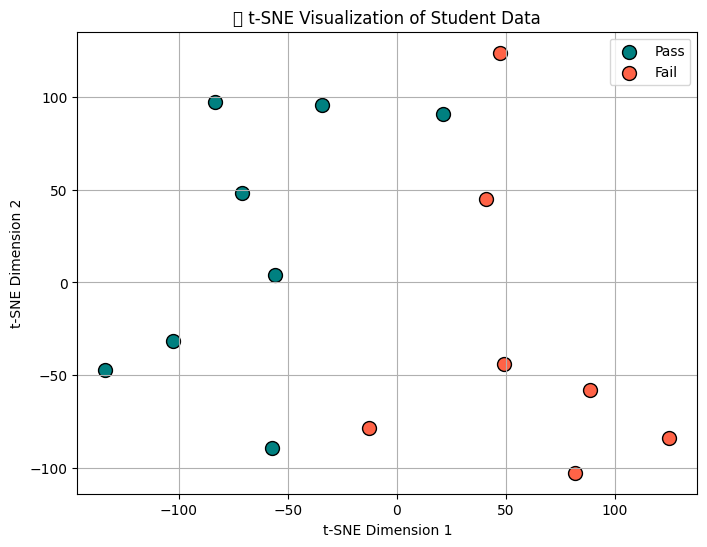


✅ Shape after feature selection: (15, 3)
✅ Shape after PCA: (15, 2)

✅ Pipeline trained successfully!
⚙️ PCA components changed to 3

🔍 PCA Feature Importance (Loadings):
              PC1       PC2
Maths    0.267355  0.592127
Science -0.283418  0.544817
English  0.499693  0.419360
History  0.505331 -0.420350
Sports   0.585784 -0.001763


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


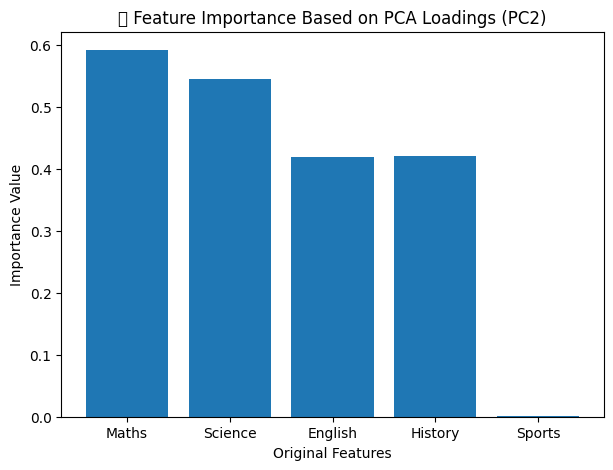

In [ ]:
# ===============================================
# 📘 STEP 1 — IMPORT LIBRARIES
# ===============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.dicision_tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from mpl_toolkits.mplot3d import Axes3D  # 3D plotting


# ===============================================
# 📊 STEP 2 — CREATE STUDENT DATASET
# ===============================================
np.random.seed(42)

data = {
    'Maths': np.random.randint(50, 100, 15),
    'Science': np.random.randint(45, 95, 15),
    'English': np.random.randint(40, 90, 15),
    'History': np.random.randint(35, 85, 15),
    'Sports': np.random.randint(20, 100, 15)
}

# Target Variable (Pass / Fail)
result = [
    'Pass' if (m + s + e + h + sp) / 5 > 60 else 'Fail'
    for m, s, e, h, sp in zip(
        data['Maths'],
        data['Science'],
        data['English'],
        data['History'],
        data['Sports']
    )
]

df = pd.DataFrame(data)
df['Result'] = result

print("🎓 Original Dataset:")
print(df.head(15))


# ===============================================
# ⚙️ STEP 3 — SCALE THE DATA
# ===============================================
X = df.drop('Result', axis=1)
y = df['Result']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n🔢 Scaled Features:")
print(pd.DataFrame(X_scaled, columns=X.columns).head(15))


# ===============================================
# 🧩 STEP 4 — APPLY PCA (2 COMPONENTS)
# ===============================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Result'] = y

print("\n📉 PCA Reduced Data:")
print(df_pca.head(15))


# ===============================================
# 🎨 STEP 5 — 2D PCA VISUALIZATION
# ===============================================
colors = {'Pass': 'teal', 'Fail': 'tomato'}

plt.figure(figsize=(8, 6))
for label in colors:
    subset = df_pca[df_pca['Result'] == label]
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        color=colors[label],
        label=label,
        s=100,
        edgecolors='k'
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("🎨 PCA 2D Visualization of Student Performance")
plt.legend()
plt.grid(True)
plt.show()


# ===============================================
# 🎨 STEP 6 — 3D PCA VISUALIZATION
# ===============================================
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

df_pca3 = pd.DataFrame(X_pca3, columns=['PC1', 'PC2', 'PC3'])
df_pca3['Result'] = y

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in colors:
    subset = df_pca3[df_pca3['Result'] == label]
    ax.scatter(
        subset['PC1'],
        subset['PC2'],
        subset['PC3'],
        color=colors[label],
        label=label,
        s=80
    )

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("🌈 3D PCA Visualization")
plt.legend()
plt.show()


# ===============================================
# 🌌 STEP 7 — t-SNE VISUALIZATION
# ===============================================
tsne = TSNE(
    n_components=2,
    perplexity=5,
    learning_rate=100,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Result'] = y

plt.figure(figsize=(8, 6))
for label in colors:
    subset = df_tsne[df_tsne['Result'] == label]
    plt.scatter(
        subset['Dim1'],
        subset['Dim2'],
        color=colors[label],
        label=label,
        s=100,
        edgecolors='k'
    )

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("🌈 t-SNE Visualization of Student Data")
plt.legend()
plt.grid(True)
plt.show()


# ===============================================
# 🧠 STEP 8 — FEATURE SELECTION + PCA
# ===============================================
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)

print("\n✅ Shape after feature selection:", X_selected.shape)

pca_selected = PCA(n_components=2)
X_final = pca_selected.fit_transform(X_selected)

print("✅ Shape after PCA:", X_final.shape)


# ===============================================
# 🧩 STEP 9 — PIPELINE + HYPERPARAMETERS
# ===============================================
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression())
])

# Encode target
y_num = [1 if val == 'Pass' else 0 for val in y]

pipe.fit(X, y_num)
print("\n✅ Pipeline trained successfully!")

# Change hyperparameter
pipe.set_params(pca__n_components=3)
print("⚙️ PCA components changed to 3")


# ===============================================
# 📊 STEP 10 — PCA LOADINGS (FEATURE IMPORTANCE)
# ===============================================
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

print("\n🔍 PCA Feature Importance (Loadings):")
print(loadings)

plt.figure(figsize=(7, 5))
plt.bar(loadings.index, abs(loadings['PC2']))
plt.xlabel("Original Features")
plt.ylabel("Importance Value")
plt.title("📊 Feature Importance Based on PCA Loadings (PC2)")
plt.show()


 Custom Dataset Created Successfully!
   Age  Salary  Experience  Buy
0   58   62107           6    0
1   48  106202          13    1
2   34   71663          15    1
3   27   35708           3    0
4   40  111906           8    0

📊 MODEL SELECTION RESULTS (Before Tuning):
           Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Random Forest     0.983      0.973     1.0     0.986    0.979

⚙️ Best Parameters Found: {'criterion': 'gini', 'max_depth': 4}

📈 POST-TUNING RESULTS:
Accuracy : 0.983
Precision: 0.973
Recall : 1.0
F1-Score : 0.986
ROC-AUC : 0.979

 CONFUSION MATRIX (Tuned Decision Tree):
 [[23  1]
 [ 0 36]]


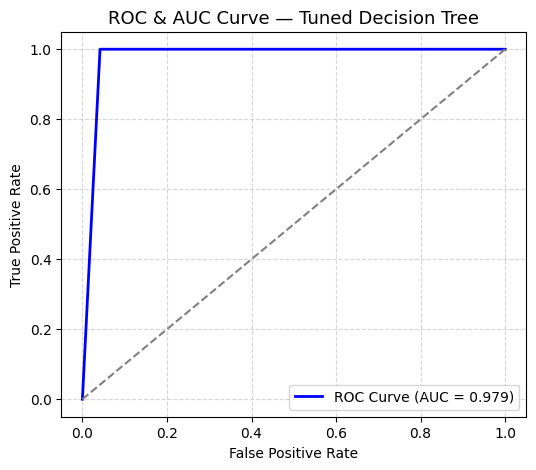

In [ ]:
# =============================================================================
# 1.POST-TUNING EVALUATION (Decision Tree)
# 2.MODEL SELECTION
# 3.COMPARING MODEL MATRICS(ACCURACY,PRECISION,RECALL,F1 SCORE,ROC-AUC)
# 4.CONFUSION MATRIX
# =============================================================================
# ==========================================
# SIMPLE MODEL EVALUATION PIPELINE
# ==========================================
# 1️⃣ IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc )
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# ==========================================
# 2️⃣ CREATE A SIMPLE CUSTOM DATASET
# ==========================================
np.random.seed(42)
n = 200
# Create a simple dataset for classification
age = np.random.randint(20, 60, n)
salary = np.random.randint(20000, 120000, n)
experience = np.random.randint(1, 20, n)
# Target rule (not perfect, creates mixed labels)
buy = np.where(((age < 35) & (salary > 60000)) | (experience > 10), 1, 0)
df = pd.DataFrame({ "Age": age, "Salary": salary, "Experience": experience, "Buy": buy })
X = df[["Age", "Salary", "Experience"]]
y = df["Buy"]
# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )
print(" Custom Dataset Created Successfully!")
print(df.head())
# ==========================================
# 3️⃣ MODEL SELECTION
# ==========================================
models = { "Logistic Regression": LogisticRegression(max_iter=500),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
           "Random Forest": RandomForestClassifier(random_state=42)
           }
results = []
for name, model in models.items(): model.fit(X_train, y_train)
y_pred = model.predict(X_test)
results.append({ "Model": name,
                 "Accuracy": round(accuracy_score(y_test, y_pred), 3),
                 "Precision": round(precision_score(y_test, y_pred), 3),
                 "Recall": round(recall_score(y_test, y_pred), 3),
                 "F1-Score": round(f1_score(y_test, y_pred), 3),
                 "ROC-AUC": round(roc_auc_score(y_test, y_pred), 3)
                 })
df_results = pd.DataFrame(results)
print("\n📊 MODEL SELECTION RESULTS (Before Tuning):")
print(df_results)
# ==========================================
# 4️⃣ POST-TUNING EVALUATION (Decision Tree)
# ==========================================
param_grid = {"max_depth": [2, 3, 4, 5, 6, 8],
              "criterion": ["gini", "entropy"]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("\n⚙️ Best Parameters Found:", grid.best_params_)
y_pred_tuned = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
# Evaluation
acc = round(accuracy_score(y_test, y_pred_tuned),3)
prec = round(precision_score(y_test, y_pred_tuned),3)
rec = round(recall_score(y_test, y_pred_tuned), 3)
f1 = round(f1_score(y_test, y_pred_tuned),3)
roc_auc = round(roc_auc_score(y_test, y_pred_tuned),3)
print("\n📈 POST-TUNING RESULTS:")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall :", rec)
print("F1-Score :", f1)
print("ROC-AUC :", roc_auc)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
print("\n CONFUSION MATRIX (Tuned Decision Tree):\n", cm)
# ==========================================
# 5️⃣ ROC & AUC CURVE VISUALIZATION
# ==========================================
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc_value:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC & AUC Curve — Tuned Decision Tree", fontsize=13)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

First 5 rows of data:
   Age   BMI  BloodPressure  SugarLevel  Diabetes
0   58  25.2            138          94         0
1   48  24.7            115         123         0
2   34  23.0             98         127         0
3   62  18.2            146         136         1
4   27  21.4             98         173         0

--- Bias–Variance Tradeoff Example ---
Simple Model (Underfit) Coefficients: [0.         0.02277528]

First 5 rows of Polynomial Features:
     1   Age
0  1.0  58.0
1  1.0  48.0
2  1.0  34.0
3  1.0  62.0
4  1.0  27.0
Complex Model (Overfit) Coefficients: [ 0.00000000e+00 -2.45645026e+01  2.39241775e+00 -8.17541755e-02
  1.18366630e-03 -6.18684366e-06]

First 5 rows of Polynomial Features:
     1   Age   Age^2     Age^3       Age^4        Age^5
0  1.0  58.0  3364.0  195112.0  11316496.0  656356768.0
1  1.0  48.0  2304.0  110592.0   5308416.0  254803968.0
2  1.0  34.0  1156.0   39304.0   1336336.0   45435424.0
3  1.0  62.0  3844.0  238328.0  14776336.0  916132832.0
4  1.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


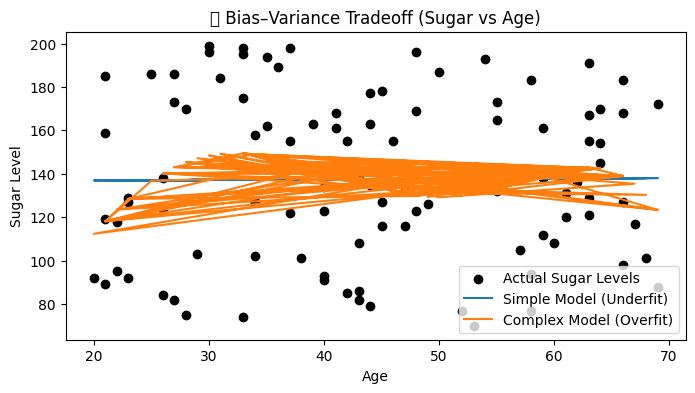


--- Learning Curve Example ---
Mean Training Accuracy: [0.975      0.925      0.91666667 0.94375    0.92       0.90833333
 0.93571429 0.921875   0.93055556 0.935     ]
Mean Testing Accuracy: [0.77 0.87 0.88 0.89 0.89 0.91 0.92 0.92 0.92 0.91]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


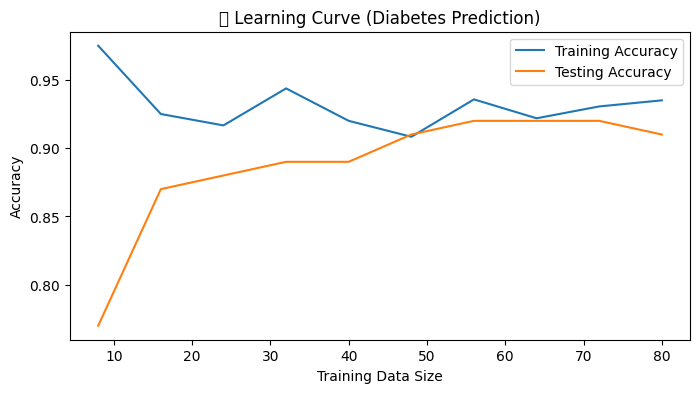


--- Model Complexity Example ---
Depth: 1 | Train Acc: 0.843 | Test Acc: 0.867
Depth: 2 | Train Acc: 0.857 | Test Acc: 0.667
Depth: 3 | Train Acc: 1.000 | Test Acc: 1.000
Depth: 4 | Train Acc: 1.000 | Test Acc: 1.000
Depth: 5 | Train Acc: 1.000 | Test Acc: 1.000
Depth: 6 | Train Acc: 1.000 | Test Acc: 1.000
Depth: 7 | Train Acc: 1.000 | Test Acc: 1.000
Depth: 8 | Train Acc: 1.000 | Test Acc: 1.000
Depth: 9 | Train Acc: 1.000 | Test Acc: 1.000
Depth: 10 | Train Acc: 1.000 | Test Acc: 1.000


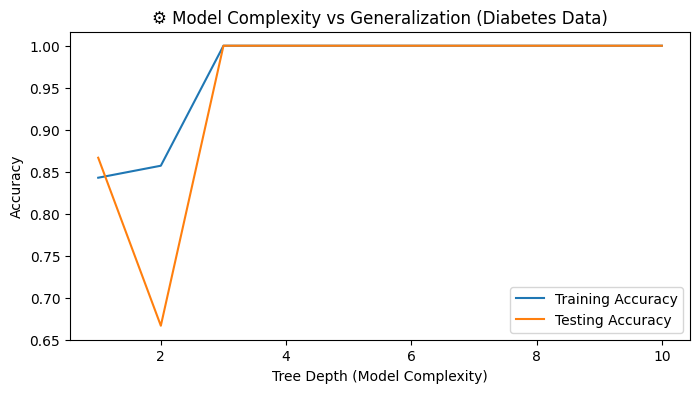

In [ ]:
# ============================================================
# 1️.Bias–Variance Tradeoff
# 2️.Learning Curves
# 3️.Model Complexity vs Generalization
# ============================================================
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score
# ============================================================
# 🧩 STEP 1 — CREATE SIMPLE MEDICAL DATASET (DIABETES EXAMPLE)
# ============================================================
np.random.seed(42)
# same random results every time
# Create data for 100 patients
n = 100
age = np.random.randint(20, 70, n)
bmi = np.random.uniform(18, 35, n)
bp = np.random.randint(80, 160, n)
sugar = np.random.randint(70, 200, n)
# Create target column: 1 = Diabetes, 0 = No Diabetes
diabetes = ((sugar > 140) & (bmi > 28)) | (bp > 140)
diabetes = diabetes.astype(int)
# Combine into DataFrame
df = pd.DataFrame({ 'Age': age,
                   'BMI': bmi.round(1),
                    'BloodPressure': bp,
                    'SugarLevel': sugar,
                    'Diabetes': diabetes })
print("First 5 rows of data:")
print(df.head())
# ============================================================
# 🎯 STEP 2 — BIAS-VARIANCE TRADEOFF
# ============================================================
print("\n--- Bias–Variance Tradeoff Example ---")
# Use Age to predict SugarLevel
X = df[['Age']]
y = df['SugarLevel']
# Simple model (Underfit)
poly1 = PolynomialFeatures(degree=1)
#age,intercept
X1 = poly1.fit_transform(X)
model1 = LinearRegression().fit(X1, y)
pred1 = model1.predict(X1)
print("Simple Model (Underfit) Coefficients:", model1.coef_)
print("\nFirst 5 rows of Polynomial Features:")
print(pd.DataFrame(X1, columns=poly1.get_feature_names_out(['Age'])).head())
# Complex model (Overfit)
poly2 = PolynomialFeatures(degree=5)
#age,age1,age2,age3,age4 for 20,400,
X2 = poly2.fit_transform(X)
model2 = LinearRegression().fit(X2, y)
pred2 = model2.predict(X2)
print("Complex Model (Overfit) Coefficients:", model2.coef_)
print("\nFirst 5 rows of Polynomial Features:")
print(pd.DataFrame(X2, columns=poly2.get_feature_names_out(['Age'])).head())
# Plot
plt.figure(figsize=(8,4))
plt.scatter(X, y, color='black', label='Actual Sugar Levels')
plt.plot(X, pred1, label='Simple Model (Underfit)')
plt.plot(X, pred2, label='Complex Model (Overfit)')
plt.title('🎯 Bias–Variance Tradeoff (Sugar vs Age)')
plt.xlabel('Age')
plt.ylabel('Sugar Level')
plt.legend()
plt.show()
# ============================================================
# 📈 STEP 3 — LEARNING CURVE (DIABETES PREDICTION)
# ============================================================
print("\n--- Learning Curve Example ---")
X = df[['Age', 'BMI', 'BloodPressure', 'SugarLevel']]
y = df['Diabetes']
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve( LogisticRegression(max_iter=500), X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5 )
# Compute mean accuracy
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
print("Mean Training Accuracy:", train_mean)
print("Mean Testing Accuracy:", test_mean)
# Plot learning curve
plt.figure(figsize=(8,4))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Testing Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.title('📈 Learning Curve (Diabetes Prediction)')
plt.legend()
plt.show()
# ============================================================
# ⚙️ STEP 4 — MODEL COMPLEXITY VS GENERALIZATION
# ============================================================
print("\n--- Model Complexity Example ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_acc, test_acc, depths = [], [], range(1, 11)
# Train Decision Trees with different depths
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    print(f"Depth: {d} | Train Acc: {train_accuracy:.3f} | Test Acc: {test_accuracy:.3f}")
# Plot
plt.figure(figsize=(8, 4))
plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, test_acc, label='Testing Accuracy')
plt.xlabel('Tree Depth (Model Complexity)')
plt.ylabel('Accuracy')
plt.title('⚙️ Model Complexity vs Generalization (Diabetes Data)')
plt.legend()
plt.show()